## Imports

In [119]:
#initial imports
import pandas as pd
import numpy as np
from IPython.display import Image
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel,WhiteKernel
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report

from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#google colab setup
# import os
# from google.colab import drive

# #mounting my drive on Google Colab
# drive.mount('/content/drive')

# #cd'ing into the folder that has the datasets required for this project
# %cd "/content/drive/MyDrive/CUSP 5003: Machine Learning for Cities/final-project"

# #checking the contents of my folder
# !ls

Mounted at /content/drive
/content/drive/MyDrive/CUSP 5003: Machine Learning for Cities/final-project
final_hyper_temp_full_data_mlc.csv  vadali-abhi-final-model-final.ipynb
iris_csv.csv			    X.csv
_map.html			    y.csv
map.html			    y_pred.csv


## Data Formatting/EDA

In [ ]:
#setting a random seed for reproducability
np.random.seed(10)

In [ ]:
#looking at our merged dataset
final_data = pd.read_csv("final_hyper_temp_full_data_mlc.csv")
final_data.head()

<ipython-input-4-bede311928b0>:2: DtypeWarning: Columns (23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  final_data = pd.read_csv("final_hyper_temp_full_data_mlc.csv")


,sensor_id,longitude,latitude,airtemp,day,hour,year,install_type,borough,ntacode,...,homeowner_vacancy_rate,median_age,all_pop,white_pop,baa_pop,native_american_pop,asian_pop,hawaiian_pacific_islander_pop,other_pop,hisp_pop
0,Bk-BR_01,-73.91691,40.666205,71.189000,2018-06-15T04:00:00Z,1,2018,Street Tree,Brooklyn,BK81,...,0.0,68.0,44.1,139.0,0.0,0.0,0.0,4269.0,491.0,10.0
1,Bk-BR_01,-73.91691,40.666205,70.243333,2018-06-15T04:00:00Z,2,2018,Street Tree,Brooklyn,BK81,...,0.0,68.0,44.1,139.0,0.0,0.0,0.0,4269.0,491.0,10.0
2,Bk-BR_01,-73.91691,40.666205,69.392667,2018-06-15T04:00:00Z,3,2018,Street Tree,Brooklyn,BK81,...,0.0,68.0,44.1,139.0,0.0,0.0,0.0,4269.0,491.0,10.0
3,Bk-BR_01,-73.91691,40.666205,68.263167,2018-06-15T04:00:00Z,4,2018,Street Tree,Brooklyn,BK81,...,0.0,68.0,44.1,139.0,0.0,0.0,0.0,4269.0,491.0,10.0
4,Bk-BR_01,-73.91691,40.666205,67.114000,2018-06-15T04:00:00Z,5,2018,Street Tree,Brooklyn,BK81,...,0.0,68.0,44.1,139.0,0.0,0.0,0.0,4269.0,491.0,10.0


In [ ]:
#looking at some summary statistics of our dataset
final_data.describe()

,longitude,latitude,airtemp,hour,year,cooling_station_min_dist,num_cooling_stations_w_in_1_mi,cooling_station_w_in_1_mics_spray_adapter,cooling_station_w_in_1_midrinking_fountain_spray_adapter,cooling_station_w_in_1_mimisting_station,...,homeowner_vacancy_rate,median_age,all_pop,white_pop,baa_pop,native_american_pop,asian_pop,hawaiian_pacific_islander_pop,other_pop,hisp_pop
count,2.097150e+06,2.097150e+06,2.085443e+06,2.097150e+06,2097150.0,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,...,1.772870e+06,1.840674e+06,1.828882e+06,1.840674e+06,1.840674e+06,1.840674e+06,1.840674e+06,1.840674e+06,1.840674e+06,1.840674e+06
mean,-7.390683e+01,4.074862e+01,7.598206e+01,1.149320e+01,2018.5,4.780538e-01,8.549237e+00,9.221505e-01,7.961710e-01,3.929950e+00,...,2.317599e+00,5.587458e+01,7.757398e+01,3.323335e+01,5.336489e+00,1.802426e+01,1.029180e+01,4.387759e+03,8.076785e+02,5.503309e+01
std,5.331265e-02,7.690639e-02,8.998371e+00,6.915477e+00,0.5,2.897947e-01,7.537611e+00,1.396362e+00,8.577970e-01,3.927418e+00,...,5.978012e+00,6.615090e+01,1.308977e+01,3.912046e+01,1.560378e+01,3.858243e+01,2.226064e+01,1.683405e+03,8.935903e+02,5.765188e+01
min,-7.399898e+01,4.064674e+01,4.603100e+01,0.000000e+00,2018.0,2.277033e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,4.410000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-7.394520e+01,4.067022e+01,7.059483e+01,5.250000e+00,2018.0,2.328566e-01,2.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,2.000000e+01,7.070000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.315000e+03,2.470000e+02,4.000000e+00
50%,-7.391445e+01,4.078953e+01,7.570933e+01,1.100000e+01,2018.5,3.929422e-01,6.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,...,0.000000e+00,4.100000e+01,7.820000e+01,2.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.373000e+03,4.910000e+02,4.500000e+01
75%,-7.389150e+01,4.080856e+01,8.184933e+01,1.700000e+01,2019.0,6.939578e-01,1.500000e+01,2.000000e+00,2.000000e+00,7.000000e+00,...,1.600000e+00,5.900000e+01,8.380000e+01,5.200000e+01,0.000000e+00,2.200000e+01,8.000000e+00,5.342000e+03,9.940000e+02,8.200000e+01
max,-7.373540e+01,4.088462e+01,1.149637e+02,2.300000e+01,2019.0,1.232118e+00,3.100000e+01,4.000000e+00,2.000000e+00,1.700000e+01,...,4.640000e+01,4.260000e+02,1.101000e+02,1.800000e+02,6.300000e+01,3.810000e+02,1.400000e+02,9.906000e+03,5.425000e+03,2.820000e+02


In [ ]:
#looking at the types of each column
final_data.dtypes

sensor_id                                                    object
longitude                                                   float64
latitude                                                    float64
airtemp                                                     float64
day                                                          object
hour                                                          int64
year                                                          int64
install_type                                                 object
borough                                                      object
ntacode                                                      object
cooling_station_min_dist                                    float64
closest_cooling_site_type                                    object
num_cooling_stations_w_in_1_mi                                int64
cooling_station_w_in_1_mics_spray_adapter                     int64
cooling_station_w_in_1_midrinking_fountain_spray

In [ ]:
#grouping our data based on our lat/long and the average airtemp of all the measurements at this location
grouped_final_data = final_data.groupby(['longitude','latitude'])['airtemp'].mean()
grouped_final_data = pd.DataFrame(grouped_final_data)
grouped_final_data = grouped_final_data.reset_index()
grouped_final_data

,longitude,latitude,airtemp
0,-73.998978,40.683311,76.025720
1,-73.997135,40.681932,75.488549
2,-73.996809,40.680646,76.926632
3,-73.995408,40.682168,76.183613
4,-73.994581,40.679143,75.132877
...,...,...,...
418,-73.737039,40.699254,74.827489
419,-73.736782,40.701881,75.395710
420,-73.736292,40.702950,75.690818
421,-73.736196,40.704577,75.803438


In [ ]:
grouped_final_data = final_data.groupby(['longitude','latitude'])
grouped_dataframe = grouped_final_data.apply(lambda x: (x['airtemp'] > 80).mean())
grouped_dataframe = pd.DataFrame(grouped_dataframe)
grouped_dataframe = grouped_dataframe.rename(columns={0: 'airtemp'})
grouped_dataframe = grouped_dataframe.reset_index()
grouped_dataframe
# grouped_dataframe = grouped_dataframe.reset_index(name='airtemp')
# grouped_dataframe

,longitude,latitude,airtemp
0,-73.998978,40.683311,0.311737
1,-73.997135,40.681932,0.282225
2,-73.996809,40.680646,0.357870
3,-73.995408,40.682168,0.318860
4,-73.994581,40.679143,0.276798
...,...,...,...
418,-73.737039,40.699254,0.254749
419,-73.736782,40.701881,0.280529
420,-73.736292,40.702950,0.313433
421,-73.736196,40.704577,0.293758


<Axes: ylabel='Density'>

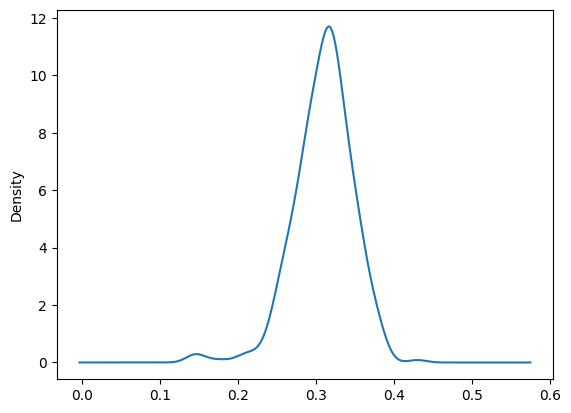

In [ ]:
# Distribution of proportion of air temperatures above 80 F
grouped_dataframe['airtemp'].plot(kind='kde')

## Model Building - Predicting Hyperlocal Temperatures

### Using lat/long and the rest of our features to predict hyperlocal temperature data

In [89]:
#looking back at our original dataframe
grouped_final_data = grouped_dataframe
grouped_final_data

,longitude,latitude,airtemp
0,-73.998978,40.683311,0.311737
1,-73.997135,40.681932,0.282225
2,-73.996809,40.680646,0.357870
3,-73.995408,40.682168,0.318860
4,-73.994581,40.679143,0.276798
...,...,...,...
418,-73.737039,40.699254,0.254749
419,-73.736782,40.701881,0.280529
420,-73.736292,40.702950,0.313433
421,-73.736196,40.704577,0.293758


In [90]:
#merging our data
merged_df = pd.merge(grouped_final_data, final_data, on=['longitude', 'latitude'])

#looking at our merged_df
merged_df

,longitude,latitude,airtemp_x,sensor_id,airtemp_y,day,hour,year,install_type,borough,...,homeowner_vacancy_rate,median_age,all_pop,white_pop,baa_pop,native_american_pop,asian_pop,hawaiian_pacific_islander_pop,other_pop,hisp_pop
0,-73.998978,40.683311,0.311737,Bk-RH_09,64.439000,2019-09-30T04:00:00Z,7,2019,Street Tree,Brooklyn,...,7.9,73.0,96.1,0.0,0.0,134.0,0.0,3894.0,3546.0,20.0
1,-73.998978,40.683311,0.311737,Bk-RH_09,64.296167,2019-09-30T04:00:00Z,8,2019,Street Tree,Brooklyn,...,7.9,73.0,96.1,0.0,0.0,134.0,0.0,3894.0,3546.0,20.0
2,-73.998978,40.683311,0.311737,Bk-RH_09,70.179333,2019-09-30T04:00:00Z,15,2019,Street Tree,Brooklyn,...,7.9,73.0,96.1,0.0,0.0,134.0,0.0,3894.0,3546.0,20.0
3,-73.998978,40.683311,0.311737,Bk-RH_09,68.685000,2019-09-30T04:00:00Z,16,2019,Street Tree,Brooklyn,...,7.9,73.0,96.1,0.0,0.0,134.0,0.0,3894.0,3546.0,20.0
4,-73.998978,40.683311,0.311737,Bk-RH_09,65.801167,2019-09-30T04:00:00Z,5,2019,Street Tree,Brooklyn,...,7.9,73.0,96.1,0.0,0.0,134.0,0.0,3894.0,3546.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097145,-73.735395,40.703253,0.281886,Q-CH_09,65.658500,2018-10-15T04:00:00Z,16,2018,Street Tree,Queens,...,1.4,112.0,80.1,0.0,0.0,22.0,0.0,4636.0,147.0,60.0
2097146,-73.735395,40.703253,0.281886,Q-CH_09,65.351833,2018-10-15T04:00:00Z,17,2018,Street Tree,Queens,...,1.4,112.0,80.1,0.0,0.0,22.0,0.0,4636.0,147.0,60.0
2097147,-73.735395,40.703253,0.281886,Q-CH_09,65.501667,2018-10-15T04:00:00Z,18,2018,Street Tree,Queens,...,1.4,112.0,80.1,0.0,0.0,22.0,0.0,4636.0,147.0,60.0
2097148,-73.735395,40.703253,0.281886,Q-CH_09,66.158000,2018-10-15T04:00:00Z,19,2018,Street Tree,Queens,...,1.4,112.0,80.1,0.0,0.0,22.0,0.0,4636.0,147.0,60.0


In [91]:
#looking at our merged_df columns
merged_df.columns

Index(['longitude', 'latitude', 'airtemp_x', 'sensor_id', 'airtemp_y', 'day',
       'hour', 'year', 'install_type', 'borough', 'ntacode',
       'cooling_station_min_dist', 'closest_cooling_site_type',
       'num_cooling_stations_w_in_1_mi',
       'cooling_station_w_in_1_mics_spray_adapter',
       'cooling_station_w_in_1_midrinking_fountain_spray_adapter',
       'cooling_station_w_in_1_mimisting_station',
       'cooling_station_w_in_1_mihydrant_spray_cap',
       'cooling_station_w_in_1_mibuckner_box_spray_adapter',
       'cooling_station_w_in_1_mirpz_spray_adapter',
       'cooling_station_w_in_1_miground_hydrant_spray_adapter',
       'cooling_station_w_in_1_miother',
       'cooling_station_w_in_1_mispray_bollard', 'tract_id', 'census_tract',
       'county', 'avg_household_size', 'avg_family_size', 'per_capita_income',
       'homeowner_vacancy_rate', 'median_age', 'all_pop', 'white_pop',
       'baa_pop', 'native_american_pop', 'asian_pop',
       'hawaiian_pacific_islander

In [92]:
#dropping the sensor_id, airtemp_y, day, hour, year, ntacode, cooling_station_w_in_1_mispray_bollard, census_tract, and tract_id columns

#we choose to keep the following columns:
#install_type, borough, closest_cooling_site_type, census_tract, county
#cooling_station_min_dist, num_cooling_stations_w_in_1_mi, cooling_station_w_in_1_mics_spray_adapter
#cooling_station_w_in_1_midrinking_fountain_spray_adapter, cooling_station_w_in_1_mimisting_station
#cooling_station_w_in_1_mibuckner_box_spray_adapter, cooling_station_w_in_1_mirpz_spray_adapter, 
#cooling_station_w_in_1_miground_hydrant_spray_adapter, cooling_station_w_in_1_miother, avg_household_size, avg_family_size
#per_capita_income, homeowner_vacancy_rate, median_age

merged_df_filtered = merged_df.drop(['sensor_id', 'airtemp_y', 'day', 'hour', 'year', 'ntacode', 'cooling_station_w_in_1_mispray_bollard', 'tract_id', 'census_tract'], axis=1)
merged_df_filtered.head(5)

,longitude,latitude,airtemp_x,install_type,borough,cooling_station_min_dist,closest_cooling_site_type,num_cooling_stations_w_in_1_mi,cooling_station_w_in_1_mics_spray_adapter,cooling_station_w_in_1_midrinking_fountain_spray_adapter,...,homeowner_vacancy_rate,median_age,all_pop,white_pop,baa_pop,native_american_pop,asian_pop,hawaiian_pacific_islander_pop,other_pop,hisp_pop
0,-73.998978,40.683311,0.311737,Street Tree,Brooklyn,0.827094,Drinking Fountain Spray Adapter,1,0,1,...,7.9,73.0,96.1,0.0,0.0,134.0,0.0,3894.0,3546.0,20.0
1,-73.998978,40.683311,0.311737,Street Tree,Brooklyn,0.827094,Drinking Fountain Spray Adapter,1,0,1,...,7.9,73.0,96.1,0.0,0.0,134.0,0.0,3894.0,3546.0,20.0
2,-73.998978,40.683311,0.311737,Street Tree,Brooklyn,0.827094,Drinking Fountain Spray Adapter,1,0,1,...,7.9,73.0,96.1,0.0,0.0,134.0,0.0,3894.0,3546.0,20.0
3,-73.998978,40.683311,0.311737,Street Tree,Brooklyn,0.827094,Drinking Fountain Spray Adapter,1,0,1,...,7.9,73.0,96.1,0.0,0.0,134.0,0.0,3894.0,3546.0,20.0
4,-73.998978,40.683311,0.311737,Street Tree,Brooklyn,0.827094,Drinking Fountain Spray Adapter,1,0,1,...,7.9,73.0,96.1,0.0,0.0,134.0,0.0,3894.0,3546.0,20.0


In [93]:
#one hot encoding our categorical variables
merged_df_filtered = pd.get_dummies(merged_df_filtered, columns=['install_type', 'borough', 'closest_cooling_site_type', 'county'])
merged_df_filtered

,longitude,latitude,airtemp_x,cooling_station_min_dist,num_cooling_stations_w_in_1_mi,cooling_station_w_in_1_mics_spray_adapter,cooling_station_w_in_1_midrinking_fountain_spray_adapter,cooling_station_w_in_1_mimisting_station,cooling_station_w_in_1_mihydrant_spray_cap,cooling_station_w_in_1_mibuckner_box_spray_adapter,...,closest_cooling_site_type_Buckner Box Spray Adapter,closest_cooling_site_type_CS Spray Adapter,closest_cooling_site_type_Drinking Fountain Spray Adapter,closest_cooling_site_type_Misting Station,closest_cooling_site_type_Other,closest_cooling_site_type_RPZ Spray Adapter,county_Bronx County,county_Kings County,county_New York County,county_Queens County
0,-73.998978,40.683311,0.311737,0.827094,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,-73.998978,40.683311,0.311737,0.827094,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,-73.998978,40.683311,0.311737,0.827094,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,-73.998978,40.683311,0.311737,0.827094,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,-73.998978,40.683311,0.311737,0.827094,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097145,-73.735395,40.703253,0.281886,0.554930,2,0,2,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2097146,-73.735395,40.703253,0.281886,0.554930,2,0,2,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2097147,-73.735395,40.703253,0.281886,0.554930,2,0,2,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2097148,-73.735395,40.703253,0.281886,0.554930,2,0,2,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [94]:
#cleaning up our dataframe --> dropping duplicates and nans
merged_df_filtered_cleaned = merged_df_filtered.drop_duplicates()
merged_df_filtered_cleaned = merged_df_filtered_cleaned.dropna()
merged_df_filtered_cleaned

,longitude,latitude,airtemp_x,cooling_station_min_dist,num_cooling_stations_w_in_1_mi,cooling_station_w_in_1_mics_spray_adapter,cooling_station_w_in_1_midrinking_fountain_spray_adapter,cooling_station_w_in_1_mimisting_station,cooling_station_w_in_1_mihydrant_spray_cap,cooling_station_w_in_1_mibuckner_box_spray_adapter,...,closest_cooling_site_type_Buckner Box Spray Adapter,closest_cooling_site_type_CS Spray Adapter,closest_cooling_site_type_Drinking Fountain Spray Adapter,closest_cooling_site_type_Misting Station,closest_cooling_site_type_Other,closest_cooling_site_type_RPZ Spray Adapter,county_Bronx County,county_Kings County,county_New York County,county_Queens County
0,-73.998978,40.683311,0.311737,0.827094,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2948,-73.997135,40.681932,0.282225,0.696404,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
5896,-73.996809,40.680646,0.357870,0.644286,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
8844,-73.995408,40.682168,0.318860,0.626012,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
11792,-73.994581,40.679143,0.276798,0.500939,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2079462,-73.737039,40.699254,0.254749,0.808882,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2082410,-73.736782,40.701881,0.280529,0.630493,2,0,2,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2085358,-73.736292,40.702950,0.313433,0.562679,2,0,2,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2091254,-73.736196,40.704577,0.293758,0.455043,2,0,2,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [95]:
#moving our air temperature target variable to the end of the dataframe
columns = list(merged_df_filtered_cleaned.columns)
columns.append(columns.pop(2))
merged_df_filtered_cleaned = merged_df_filtered_cleaned[columns]
merged_df_filtered_cleaned

,longitude,latitude,cooling_station_min_dist,num_cooling_stations_w_in_1_mi,cooling_station_w_in_1_mics_spray_adapter,cooling_station_w_in_1_midrinking_fountain_spray_adapter,cooling_station_w_in_1_mimisting_station,cooling_station_w_in_1_mihydrant_spray_cap,cooling_station_w_in_1_mibuckner_box_spray_adapter,cooling_station_w_in_1_mirpz_spray_adapter,...,closest_cooling_site_type_CS Spray Adapter,closest_cooling_site_type_Drinking Fountain Spray Adapter,closest_cooling_site_type_Misting Station,closest_cooling_site_type_Other,closest_cooling_site_type_RPZ Spray Adapter,county_Bronx County,county_Kings County,county_New York County,county_Queens County,airtemp_x
0,-73.998978,40.683311,0.827094,1,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0.311737
2948,-73.997135,40.681932,0.696404,1,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0.282225
5896,-73.996809,40.680646,0.644286,1,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0.357870
8844,-73.995408,40.682168,0.626012,1,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0.318860
11792,-73.994581,40.679143,0.500939,1,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0.276798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2079462,-73.737039,40.699254,0.808882,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0.254749
2082410,-73.736782,40.701881,0.630493,2,0,2,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0.280529
2085358,-73.736292,40.702950,0.562679,2,0,2,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0.313433
2091254,-73.736196,40.704577,0.455043,2,0,2,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0.293758


In [96]:
#initializing scaler
scaler = MinMaxScaler()

#normalizing all of our data
normalized_df1 = pd.DataFrame(scaler.fit_transform(merged_df_filtered_cleaned), columns=merged_df_filtered_cleaned.columns)

#our final normalized dataset
normalized_df1

#creating a copy - for later use
normalized_df2 = normalized_df1.copy()

#looking at our normalized df
normalized_df1

,longitude,latitude,cooling_station_min_dist,num_cooling_stations_w_in_1_mi,cooling_station_w_in_1_mics_spray_adapter,cooling_station_w_in_1_midrinking_fountain_spray_adapter,cooling_station_w_in_1_mimisting_station,cooling_station_w_in_1_mihydrant_spray_cap,cooling_station_w_in_1_mibuckner_box_spray_adapter,cooling_station_w_in_1_mirpz_spray_adapter,...,closest_cooling_site_type_CS Spray Adapter,closest_cooling_site_type_Drinking Fountain Spray Adapter,closest_cooling_site_type_Misting Station,closest_cooling_site_type_Other,closest_cooling_site_type_RPZ Spray Adapter,county_Bronx County,county_Kings County,county_New York County,county_Queens County,airtemp_x
0,0.000000,0.153747,0.665089,0.032258,0.0,0.5,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.585565
1,0.006992,0.147949,0.557022,0.032258,0.0,0.5,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.482125
2,0.008228,0.142544,0.513926,0.032258,0.0,0.5,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.747265
3,0.013543,0.148943,0.498816,0.032258,0.0,0.5,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.610534
4,0.016680,0.136225,0.395394,0.032258,0.0,0.5,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.463102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,0.993764,0.220771,0.650029,0.032258,0.0,0.5,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.385819
351,0.994738,0.231811,0.502521,0.064516,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.476181
352,0.996598,0.236307,0.446446,0.064516,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.591510
353,0.996963,0.243146,0.357443,0.064516,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.522550


In [97]:
#setting our input features to everything besides the hyperlocal temperature
X = normalized_df1.drop('airtemp_x', axis=1)

# #setting our target feature as the min cooling distance feature
y = normalized_df1['airtemp_x']

#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

#define the kernel and the Gaussian process
kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=[1]*41, length_scale_bounds=(1e-2, 1e2))

#creating our model
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1)

#building our model
gp.fit(X_train, y_train)

#looking at our kernel
print("The kernel is", gp.kernel_, "with a log marginal likelihood value of", gp.log_marginal_likelihood_value_)

#predictions for the given points 
y_pred, sigma = gp.predict(X, return_std=True)

# Evaluate the model's performance
score = gp.score(X_test, y_test)
print("\nModel score (R^2): {:.3f}".format(score))

The kernel is 0.584**2 * RBF(length_scale=[100, 100, 100, 19.2, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 23.6, 100, 100, 100, 100, 100, 100, 8.64, 8.64, 100, 100, 100, 100, 5.84, 100, 100, 100, 1, 100, 100, 100, 100, 100]) with a log marginal likelihood value of 38.166771692064

Model score (R^2): 0.280


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 1 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 2 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarni

In [98]:
# running feature importance
kernel_func = gp.kernel_
kernel_params = kernel_func.get_params()
length_scales = kernel_params['k2__length_scale']
abs_length_scales = np.abs(length_scales)
sorted_feature_indices = np.argsort(abs_length_scales)[::-1]
feature_names = list(normalized_df1.columns)
for i in sorted_feature_indices:
    print(f"Feature {feature_names[i]}: {abs_length_scales[i]}")

Feature county_Queens County: 100.00000000000004
Feature cooling_station_w_in_1_miground_hydrant_spray_adapter: 100.00000000000004
Feature all_pop: 100.00000000000004
Feature median_age: 100.00000000000004
Feature homeowner_vacancy_rate: 100.00000000000004
Feature per_capita_income: 100.00000000000004
Feature avg_family_size: 100.00000000000004
Feature avg_household_size: 100.00000000000004
Feature cooling_station_w_in_1_miother: 100.00000000000004
Feature cooling_station_w_in_1_mirpz_spray_adapter: 100.00000000000004
Feature county_New York County: 100.00000000000004
Feature cooling_station_w_in_1_mibuckner_box_spray_adapter: 100.00000000000004
Feature cooling_station_w_in_1_mihydrant_spray_cap: 100.00000000000004
Feature cooling_station_w_in_1_mimisting_station: 100.00000000000004
Feature cooling_station_w_in_1_midrinking_fountain_spray_adapter: 100.00000000000004
Feature cooling_station_w_in_1_mics_spray_adapter: 100.00000000000004
Feature cooling_station_min_dist: 100.0000000000000

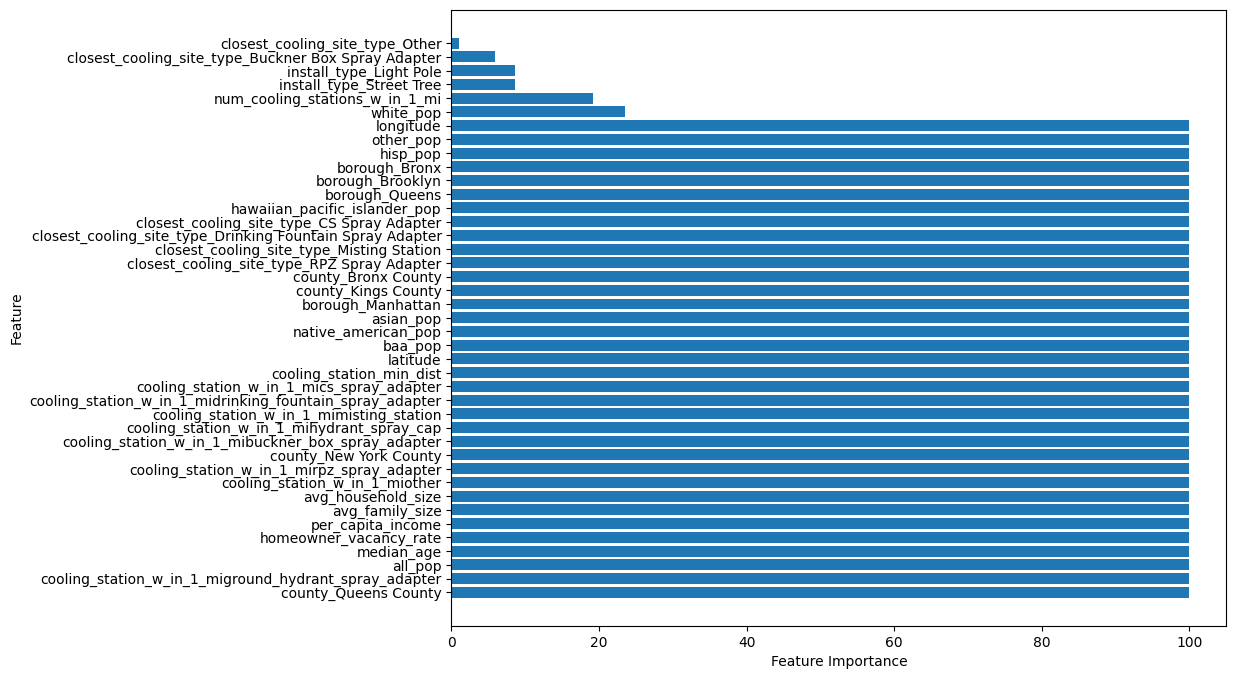

In [99]:
#plotting our feature importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(range(len(sorted_feature_indices)), abs_length_scales[sorted_feature_indices], align='center')
ax.set_yticks(range(len(sorted_feature_indices)))
ax.set_yticklabels(np.array(feature_names)[sorted_feature_indices])
ax.set_xlabel('Feature Importance')
ax.set_ylabel('Feature')

plt.show()

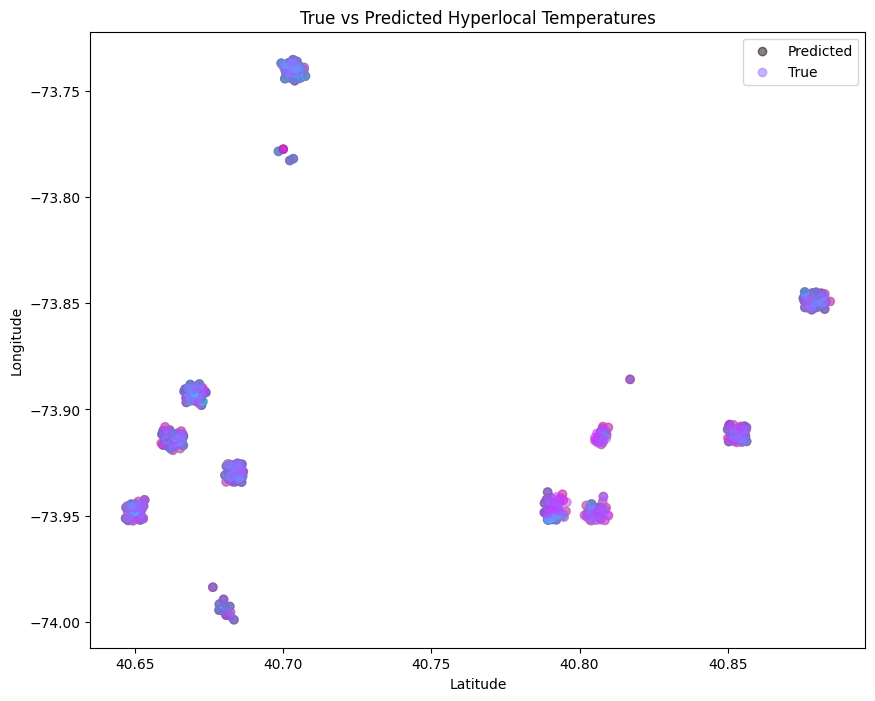

In [100]:
#plotting our results
X = normalized_df1.iloc[:,0:41].values 
y = normalized_df1.iloc[:, 41].values

#unnormalizing our lat/longs so that we can plot more accurately
unnormalized_lat_lon = merged_df_filtered_cleaned.iloc[:, :2].values

#resetting our x numpy array
X[:, :2] = unnormalized_lat_lon

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 1], X[:, 0], c=y_pred, cmap="hot", alpha=0.5, label='Predicted')
plt.scatter(X[:, 1], X[:, 0], c=y, cmap="cool", alpha=0.5, label='True')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('True vs Predicted Hyperlocal Temperatures')
plt.legend()
plt.show()

In [101]:
#saving our X_test and y_test values for later
X_test1 = X_test.copy()
y_test1 = y_test.copy()

## Model Building - Predicting Access to Cooling Stations

In [102]:
#looking at our pre-normalized dataset
merged_df_filtered_cleaned

,longitude,latitude,cooling_station_min_dist,num_cooling_stations_w_in_1_mi,cooling_station_w_in_1_mics_spray_adapter,cooling_station_w_in_1_midrinking_fountain_spray_adapter,cooling_station_w_in_1_mimisting_station,cooling_station_w_in_1_mihydrant_spray_cap,cooling_station_w_in_1_mibuckner_box_spray_adapter,cooling_station_w_in_1_mirpz_spray_adapter,...,closest_cooling_site_type_CS Spray Adapter,closest_cooling_site_type_Drinking Fountain Spray Adapter,closest_cooling_site_type_Misting Station,closest_cooling_site_type_Other,closest_cooling_site_type_RPZ Spray Adapter,county_Bronx County,county_Kings County,county_New York County,county_Queens County,airtemp_x
0,-73.998978,40.683311,0.827094,1,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0.311737
2948,-73.997135,40.681932,0.696404,1,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0.282225
5896,-73.996809,40.680646,0.644286,1,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0.357870
8844,-73.995408,40.682168,0.626012,1,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0.318860
11792,-73.994581,40.679143,0.500939,1,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0.276798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2079462,-73.737039,40.699254,0.808882,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0.254749
2082410,-73.736782,40.701881,0.630493,2,0,2,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0.280529
2085358,-73.736292,40.702950,0.562679,2,0,2,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0.313433
2091254,-73.736196,40.704577,0.455043,2,0,2,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0.293758


<Axes: ylabel='Density'>

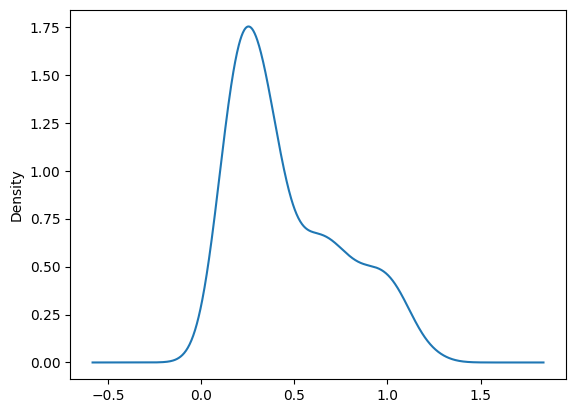

In [103]:
#plotting the distribution of minimum distances to cooling stations
merged_df_filtered_cleaned['cooling_station_min_dist'].plot(kind='kde')

In [104]:
#transforming our cooling station minimum distance to a categorical variable
#the variable will be 1 if the cooling distance is within 0.5 miles and 0 if it isn't
#this will be our target variable
merged_df_filtered_cleaned['cooling_station_min_dist'] = merged_df_filtered_cleaned['cooling_station_min_dist'].apply(lambda x: 1 if x < 0.5 else 0)
merged_df_filtered_cleaned['cooling_station_min_dist'].value_counts()

1    229
0    126
Name: cooling_station_min_dist, dtype: int64

In [105]:
#moving our target variable to the end of the dataframe
columns = list(merged_df_filtered_cleaned.columns)
columns.append(columns.pop(2))
merged_df_filtered_cleaned = merged_df_filtered_cleaned[columns]
merged_df_filtered_cleaned

,longitude,latitude,num_cooling_stations_w_in_1_mi,cooling_station_w_in_1_mics_spray_adapter,cooling_station_w_in_1_midrinking_fountain_spray_adapter,cooling_station_w_in_1_mimisting_station,cooling_station_w_in_1_mihydrant_spray_cap,cooling_station_w_in_1_mibuckner_box_spray_adapter,cooling_station_w_in_1_mirpz_spray_adapter,cooling_station_w_in_1_miground_hydrant_spray_adapter,...,closest_cooling_site_type_Drinking Fountain Spray Adapter,closest_cooling_site_type_Misting Station,closest_cooling_site_type_Other,closest_cooling_site_type_RPZ Spray Adapter,county_Bronx County,county_Kings County,county_New York County,county_Queens County,airtemp_x,cooling_station_min_dist
0,-73.998978,40.683311,1,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0.311737,0
2948,-73.997135,40.681932,1,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0.282225,0
5896,-73.996809,40.680646,1,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0.357870,0
8844,-73.995408,40.682168,1,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0.318860,0
11792,-73.994581,40.679143,1,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0.276798,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2079462,-73.737039,40.699254,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0.254749,0
2082410,-73.736782,40.701881,2,0,2,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0.280529,0
2085358,-73.736292,40.702950,2,0,2,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0.313433,0
2091254,-73.736196,40.704577,2,0,2,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0.293758,1


In [106]:
#initializing a scaler
scaler = MinMaxScaler()

#re-normalizing all of our data
normalized_df = pd.DataFrame(scaler.fit_transform(merged_df_filtered_cleaned), columns=merged_df_filtered_cleaned.columns)

#our final normalized dataset
normalized_df

,longitude,latitude,num_cooling_stations_w_in_1_mi,cooling_station_w_in_1_mics_spray_adapter,cooling_station_w_in_1_midrinking_fountain_spray_adapter,cooling_station_w_in_1_mimisting_station,cooling_station_w_in_1_mihydrant_spray_cap,cooling_station_w_in_1_mibuckner_box_spray_adapter,cooling_station_w_in_1_mirpz_spray_adapter,cooling_station_w_in_1_miground_hydrant_spray_adapter,...,closest_cooling_site_type_Drinking Fountain Spray Adapter,closest_cooling_site_type_Misting Station,closest_cooling_site_type_Other,closest_cooling_site_type_RPZ Spray Adapter,county_Bronx County,county_Kings County,county_New York County,county_Queens County,airtemp_x,cooling_station_min_dist
0,0.000000,0.153747,0.032258,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.585565,0.0
1,0.006992,0.147949,0.032258,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.482125,0.0
2,0.008228,0.142544,0.032258,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.747265,0.0
3,0.013543,0.148943,0.032258,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.610534,0.0
4,0.016680,0.136225,0.032258,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.463102,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,0.993764,0.220771,0.032258,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.385819,0.0
351,0.994738,0.231811,0.064516,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.476181,0.0
352,0.996598,0.236307,0.064516,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.591510,0.0
353,0.996963,0.243146,0.064516,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.522550,1.0


In [107]:
# X = normalized_df.iloc[:,0:126].values 
X = normalized_df.drop('cooling_station_min_dist', axis=1)

#setting our target feature as the min cooling distance feature
y = normalized_df['cooling_station_min_dist']

#we choose to cluster our data first, to take into account that geographically similar sensors should have similar distances to cooling stations
#building a k means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

#obtaining the cluster id's for each row 
cluster_ids = kmeans.predict(X)

#adding the cluster id's to our dataset
normalized_df['Cluster ID'] = cluster_ids

#viewing our dataset
normalized_df.head(5)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,longitude,latitude,num_cooling_stations_w_in_1_mi,cooling_station_w_in_1_mics_spray_adapter,cooling_station_w_in_1_midrinking_fountain_spray_adapter,cooling_station_w_in_1_mimisting_station,cooling_station_w_in_1_mihydrant_spray_cap,cooling_station_w_in_1_mibuckner_box_spray_adapter,cooling_station_w_in_1_mirpz_spray_adapter,cooling_station_w_in_1_miground_hydrant_spray_adapter,...,closest_cooling_site_type_Misting Station,closest_cooling_site_type_Other,closest_cooling_site_type_RPZ Spray Adapter,county_Bronx County,county_Kings County,county_New York County,county_Queens County,airtemp_x,cooling_station_min_dist,Cluster ID
0,0.000000,0.153747,0.032258,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.585565,0.0,3
1,0.006992,0.147949,0.032258,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.482125,0.0,3
2,0.008228,0.142544,0.032258,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.747265,0.0,3
3,0.013543,0.148943,0.032258,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.610534,0.0,3
4,0.016680,0.136225,0.032258,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.463102,0.0,3


In [108]:
#moving our target variable to the end of the dataframe
columns = list(normalized_df.columns)
columns.append(columns.pop(41))
normalized_df = normalized_df[columns]
normalized_df

,longitude,latitude,num_cooling_stations_w_in_1_mi,cooling_station_w_in_1_mics_spray_adapter,cooling_station_w_in_1_midrinking_fountain_spray_adapter,cooling_station_w_in_1_mimisting_station,cooling_station_w_in_1_mihydrant_spray_cap,cooling_station_w_in_1_mibuckner_box_spray_adapter,cooling_station_w_in_1_mirpz_spray_adapter,cooling_station_w_in_1_miground_hydrant_spray_adapter,...,closest_cooling_site_type_Misting Station,closest_cooling_site_type_Other,closest_cooling_site_type_RPZ Spray Adapter,county_Bronx County,county_Kings County,county_New York County,county_Queens County,airtemp_x,Cluster ID,cooling_station_min_dist
0,0.000000,0.153747,0.032258,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.585565,3,0.0
1,0.006992,0.147949,0.032258,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.482125,3,0.0
2,0.008228,0.142544,0.032258,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.747265,3,0.0
3,0.013543,0.148943,0.032258,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.610534,3,0.0
4,0.016680,0.136225,0.032258,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.463102,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,0.993764,0.220771,0.032258,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.385819,0,0.0
351,0.994738,0.231811,0.064516,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.476181,0,0.0
352,0.996598,0.236307,0.064516,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.591510,0,0.0
353,0.996963,0.243146,0.064516,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.522550,0,1.0


In [109]:
#we now build a random forest model that predicts whether or not a sensor has a cooling station within 0.5 miles
#setting our input features as everything besides the min cooling distance feature
# X = normalized_df.iloc[:,0:126].values 
X = normalized_df.drop('cooling_station_min_dist', axis=1)

#setting our target feature as the min cooling distance feature
y = normalized_df['cooling_station_min_dist']

#train test split
X_train, X_test, y_train, y_test = train_test_split(normalized_df.drop('cooling_station_min_dist', axis=1), normalized_df['cooling_station_min_dist'], test_size=0.3, random_state=10)

#instantiating and building random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

#generating predictions
y_pred = rf.predict(X_test)

#looking at performance 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99        36
         1.0       0.99      1.00      0.99        71

    accuracy                           0.99       107
   macro avg       0.99      0.99      0.99       107
weighted avg       0.99      0.99      0.99       107



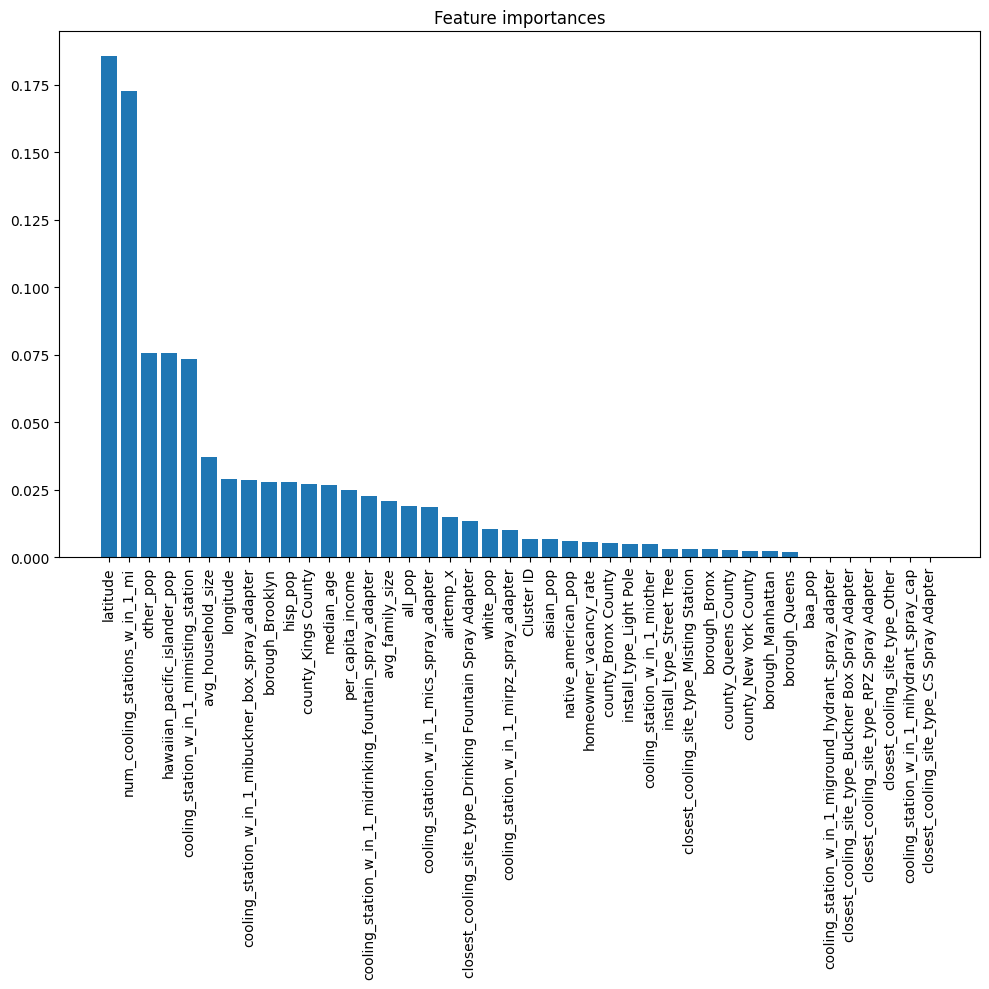

In [110]:
import matplotlib.pyplot as plt

# Get feature importances from the trained model
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10,10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

## Model Building - Combining our Results

In [111]:
#looking at our cooling station normalized df
normalized_df2

,longitude,latitude,cooling_station_min_dist,num_cooling_stations_w_in_1_mi,cooling_station_w_in_1_mics_spray_adapter,cooling_station_w_in_1_midrinking_fountain_spray_adapter,cooling_station_w_in_1_mimisting_station,cooling_station_w_in_1_mihydrant_spray_cap,cooling_station_w_in_1_mibuckner_box_spray_adapter,cooling_station_w_in_1_mirpz_spray_adapter,...,closest_cooling_site_type_CS Spray Adapter,closest_cooling_site_type_Drinking Fountain Spray Adapter,closest_cooling_site_type_Misting Station,closest_cooling_site_type_Other,closest_cooling_site_type_RPZ Spray Adapter,county_Bronx County,county_Kings County,county_New York County,county_Queens County,airtemp_x
0,0.000000,0.153747,0.665089,0.032258,0.0,0.5,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.585565
1,0.006992,0.147949,0.557022,0.032258,0.0,0.5,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.482125
2,0.008228,0.142544,0.513926,0.032258,0.0,0.5,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.747265
3,0.013543,0.148943,0.498816,0.032258,0.0,0.5,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.610534
4,0.016680,0.136225,0.395394,0.032258,0.0,0.5,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.463102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,0.993764,0.220771,0.650029,0.032258,0.0,0.5,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.385819
351,0.994738,0.231811,0.502521,0.064516,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.476181
352,0.996598,0.236307,0.446446,0.064516,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.591510
353,0.996963,0.243146,0.357443,0.064516,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.522550


In [112]:
#looking at our hyperlocal temperature normalized df
normalized_df

,longitude,latitude,num_cooling_stations_w_in_1_mi,cooling_station_w_in_1_mics_spray_adapter,cooling_station_w_in_1_midrinking_fountain_spray_adapter,cooling_station_w_in_1_mimisting_station,cooling_station_w_in_1_mihydrant_spray_cap,cooling_station_w_in_1_mibuckner_box_spray_adapter,cooling_station_w_in_1_mirpz_spray_adapter,cooling_station_w_in_1_miground_hydrant_spray_adapter,...,closest_cooling_site_type_Misting Station,closest_cooling_site_type_Other,closest_cooling_site_type_RPZ Spray Adapter,county_Bronx County,county_Kings County,county_New York County,county_Queens County,airtemp_x,Cluster ID,cooling_station_min_dist
0,0.000000,0.153747,0.032258,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.585565,3,0.0
1,0.006992,0.147949,0.032258,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.482125,3,0.0
2,0.008228,0.142544,0.032258,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.747265,3,0.0
3,0.013543,0.148943,0.032258,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.610534,3,0.0
4,0.016680,0.136225,0.032258,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.463102,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,0.993764,0.220771,0.032258,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.385819,0,0.0
351,0.994738,0.231811,0.064516,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.476181,0,0.0
352,0.996598,0.236307,0.064516,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.591510,0,0.0
353,0.996963,0.243146,0.064516,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.522550,0,1.0


In [113]:
#looking at our test set from our hyperlocal model
X_test1['hyperlocal_predictions'] = y_test1
sorted_X_test_1 = X_test1.sort_values('longitude')
sorted_X_test_1

,longitude,latitude,cooling_station_min_dist,num_cooling_stations_w_in_1_mi,cooling_station_w_in_1_mics_spray_adapter,cooling_station_w_in_1_midrinking_fountain_spray_adapter,cooling_station_w_in_1_mimisting_station,cooling_station_w_in_1_mihydrant_spray_cap,cooling_station_w_in_1_mibuckner_box_spray_adapter,cooling_station_w_in_1_mirpz_spray_adapter,...,closest_cooling_site_type_CS Spray Adapter,closest_cooling_site_type_Drinking Fountain Spray Adapter,closest_cooling_site_type_Misting Station,closest_cooling_site_type_Other,closest_cooling_site_type_RPZ Spray Adapter,county_Bronx County,county_Kings County,county_New York County,county_Queens County,hyperlocal_predictions
1,0.006992,0.147949,0.557022,0.032258,0.0,0.5,0.000000,0.0,0.00,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.482125
6,0.023697,0.147898,0.396351,0.032258,0.0,0.5,0.000000,0.0,0.00,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.522550
10,0.058030,0.123802,0.077485,0.032258,0.0,0.5,0.000000,0.0,0.00,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.634313
12,0.176991,0.660932,0.204038,0.612903,0.5,1.0,0.529412,0.0,0.75,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.625396
17,0.178146,0.599794,0.223939,0.129032,0.0,0.0,0.117647,0.0,0.25,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.337072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,0.987372,0.243911,0.331459,0.064516,0.0,1.0,0.000000,0.0,0.00,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.484503
345,0.989539,0.233714,0.470691,0.064516,0.0,1.0,0.000000,0.0,0.00,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.447051
347,0.990971,0.223023,0.616823,0.032258,0.0,0.5,0.000000,0.0,0.00,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.526117
353,0.996963,0.243146,0.357443,0.064516,0.0,1.0,0.000000,0.0,0.00,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.522550


In [114]:
#looking at our test set from our cooling station model
X_test['cooling_station_predictions'] = y_test
sorted_X_test = X_test.sort_values('longitude')
sorted_X_test

,longitude,latitude,num_cooling_stations_w_in_1_mi,cooling_station_w_in_1_mics_spray_adapter,cooling_station_w_in_1_midrinking_fountain_spray_adapter,cooling_station_w_in_1_mimisting_station,cooling_station_w_in_1_mihydrant_spray_cap,cooling_station_w_in_1_mibuckner_box_spray_adapter,cooling_station_w_in_1_mirpz_spray_adapter,cooling_station_w_in_1_miground_hydrant_spray_adapter,...,closest_cooling_site_type_Misting Station,closest_cooling_site_type_Other,closest_cooling_site_type_RPZ Spray Adapter,county_Bronx County,county_Kings County,county_New York County,county_Queens County,airtemp_x,Cluster ID,cooling_station_predictions
1,0.006992,0.147949,0.032258,0.0,0.5,0.000000,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.482125,3,0.0
6,0.023697,0.147898,0.032258,0.0,0.5,0.000000,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.522550,3,0.0
10,0.058030,0.123802,0.032258,0.0,0.5,0.000000,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.634313,3,1.0
12,0.176991,0.660932,0.612903,0.5,1.0,0.529412,0.0,0.75,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.625396,4,1.0
17,0.178146,0.599794,0.129032,0.0,0.0,0.117647,0.0,0.25,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.337072,4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,0.987372,0.243911,0.064516,0.0,1.0,0.000000,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.484503,0,1.0
345,0.989539,0.233714,0.064516,0.0,1.0,0.000000,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.447051,0,0.0
347,0.990971,0.223023,0.032258,0.0,0.5,0.000000,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.526117,0,0.0
353,0.996963,0.243146,0.064516,0.0,1.0,0.000000,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.522550,0,1.0


In [115]:
#generating our predictions dataset
sorted_X_test1_sub = sorted_X_test_1.loc[:, ['longitude', 'latitude', 'hyperlocal_predictions']]
sorted_X_test_sub = sorted_X_test.loc[:, ['longitude', 'latitude', 'cooling_station_predictions']]
predictions_df = pd.merge(sorted_X_test1_sub, sorted_X_test_sub, on=['latitude', 'longitude'])
predictions_df

,longitude,latitude,hyperlocal_predictions,cooling_station_predictions
0,0.006992,0.147949,0.482125,0.0
1,0.023697,0.147898,0.522550,0.0
2,0.058030,0.123802,0.634313,1.0
3,0.176991,0.660932,0.625396,1.0
4,0.178146,0.599794,0.337072,1.0
...,...,...,...,...
102,0.987372,0.243911,0.484503,1.0
103,0.989539,0.233714,0.447051,0.0
104,0.990971,0.223023,0.526117,0.0
105,0.996963,0.243146,0.522550,1.0


In [116]:
#joining our predictions set with our normalized dataframes to get ground truth values for hyperlocal_temperature and cooling_station_min_distance
normalized_df_sub = normalized_df.loc[:, ['longitude', 'latitude', 'airtemp_x']]
normalized_df2_sub = normalized_df2.loc[:, ['longitude', 'latitude', 'cooling_station_min_dist']]
predictions_df = pd.merge(predictions_df, normalized_df_sub, on=['latitude', 'longitude'])
predictions_df = pd.merge(predictions_df, normalized_df2_sub, on=['latitude', 'longitude'])
predictions_df

,longitude,latitude,hyperlocal_predictions,cooling_station_predictions,airtemp_x,cooling_station_min_dist
0,0.006992,0.147949,0.482125,0.0,0.482125,0.557022
1,0.023697,0.147898,0.522550,0.0,0.522550,0.396351
2,0.058030,0.123802,0.634313,1.0,0.634313,0.077485
3,0.176991,0.660932,0.625396,1.0,0.625396,0.204038
4,0.178146,0.599794,0.337072,1.0,0.337072,0.223939
...,...,...,...,...,...,...
105,0.987372,0.243911,0.484503,1.0,0.484503,0.331459
106,0.989539,0.233714,0.447051,0.0,0.447051,0.470691
107,0.990971,0.223023,0.526117,0.0,0.526117,0.616823
108,0.996963,0.243146,0.522550,1.0,0.522550,0.357443


In [117]:
#generating our labels: we will split into three different classes: 'low-risk HRI', 'high-risk HRI, adequate access to cooling', 'high risk HRI inadequate access to cooling'
#HRI stands for heat-related illness
#this is our labeling heuristic
#the label will be 'low-risk HRI' if the cooling station column is greater than or equal to 0.5 and if the air temperature column is less than 0.35
#the label will be 'high-risk HRI, adequate access to cooling' if the cooling station column is greater than or equal to 0.5 and if the air temperature column is greater than or equal to 0.35
#the label will be 'high-risk HRI, inadequate access to cooling' if the cooling station column is less than 0.5 and if the air temperature column is greater than or equal to 0.35
#in this case, 0.5 stands for how many miles away a cooling station is, and 0.35 stands for the proportion of temperatures above 80 degrees 
def labeler(row):
    cooling_distance = row['cooling_station_min_dist']
    air_temperature = row['airtemp_x']

    if air_temperature < 0.35:
        return 'low-risk HRI'
    elif cooling_distance >= 0.5 and air_temperature >= 0.35:
        return 'high-risk HRI, adequate access to cooling'
    elif cooling_distance < 0.5 and air_temperature >= 0.35:
        return 'high-risk HRI, inadequate access to cooling'

# apply the function to generate the new column
predictions_df['label'] = predictions_df.apply(labeler, axis=1)
predictions_df

,longitude,latitude,hyperlocal_predictions,cooling_station_predictions,airtemp_x,cooling_station_min_dist,label
0,0.006992,0.147949,0.482125,0.0,0.482125,0.557022,"high-risk HRI, adequate access to cooling"
1,0.023697,0.147898,0.522550,0.0,0.522550,0.396351,"high-risk HRI, inadequate access to cooling"
2,0.058030,0.123802,0.634313,1.0,0.634313,0.077485,"high-risk HRI, inadequate access to cooling"
3,0.176991,0.660932,0.625396,1.0,0.625396,0.204038,"high-risk HRI, inadequate access to cooling"
4,0.178146,0.599794,0.337072,1.0,0.337072,0.223939,low-risk HRI
...,...,...,...,...,...,...,...
105,0.987372,0.243911,0.484503,1.0,0.484503,0.331459,"high-risk HRI, inadequate access to cooling"
106,0.989539,0.233714,0.447051,0.0,0.447051,0.470691,"high-risk HRI, inadequate access to cooling"
107,0.990971,0.223023,0.526117,0.0,0.526117,0.616823,"high-risk HRI, adequate access to cooling"
108,0.996963,0.243146,0.522550,1.0,0.522550,0.357443,"high-risk HRI, inadequate access to cooling"


In [133]:
#we now build a random forest model that uses hyperlocal temperature predictions and cooling station predictions to classify our sensors 
X = predictions_df[['longitude', 'latitude', 'hyperlocal_predictions', 'cooling_station_predictions']]

#setting our target feature as the min cooling distance feature
y = predictions_df['label']

# Splitting our data into 70% train, 30% test
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999)

# #applying smote to oversample the minority classes in our set
# smote = SMOTE(random_state=10, k_neighbors=1)
# X_train_rs, y_train_rs= smote.fit_resample(X_train, y_train)

# Learning our model
dt=DecisionTreeClassifier(max_depth=20)
dt.fit(X_train, y_train)

#generating predictions
y_pred = dt.predict(X_test)

#looking at performance 
print(classification_report(y_test, y_pred, zero_division=1))

                                             precision    recall  f1-score   support

  high-risk HRI, adequate access to cooling       0.89      0.89      0.89         9
high-risk HRI, inadequate access to cooling       0.96      1.00      0.98        23
                               low-risk HRI       1.00      0.00      0.00         1

                                   accuracy                           0.94        33
                                  macro avg       0.95      0.63      0.62        33
                               weighted avg       0.94      0.94      0.92        33



## Appendix - Deprecated code

### (Part 1) - using only lat/long to predict hyperlocal temperature data

In [ ]:
#setting our X to the lat/long of each sensor
X = grouped_final_data.iloc[:,0:2].values

#setting our Y to the normalized average hyperlocal temperature of the sensor
y = np.log(grouped_final_data.iloc[:,2].values)
themean = y.mean()
y -= themean

#define the kernel and the Gaussian process
kernel = 1 * RBF(length_scale=(0.01, 0.01)) + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e10))
gp = GaussianProcessRegressor(kernel=kernel,n_restarts_optimizer=10,random_state=1)

In [ ]:
#fit to the data using maximum likelihood estimation of the parameters
gp.fit(X, y)

#looking at our kernel
print("The kernel is", gp.kernel_, "with a log marginal likelihood value of", gp.log_marginal_likelihood_value_)

# predictions for the given points 
y_pred, sigma = gp.predict(X, return_std=True)

The kernel is 0.00752**2 * RBF(length_scale=[0.00228, 0.00321]) + WhiteKernel(noise_level=5.59e-05) with a log marginal likelihood value of 1394.335138675629


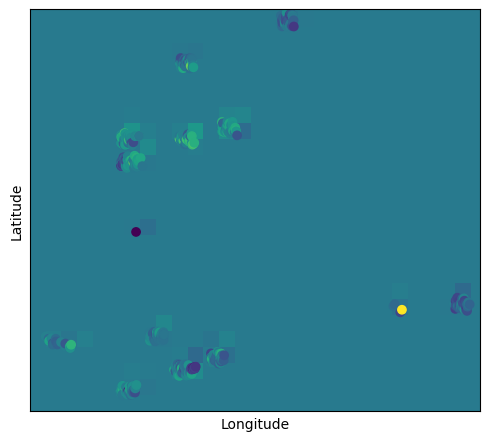

In [ ]:
# predictions on a mesh
x_min, x_max = X[:, 0].min() - 0.01, X[:, 0].max() + 0.01
y_min, y_max = X[:, 1].min() - 0.01, X[:, 1].max() + 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = gp.predict(np.c_[xx.ravel(), yy.ravel()])

# first figure shows the true y points and our predictions on the mesh
plt.figure(figsize=(5, 5))
Z = Z.reshape((xx.shape[0], xx.shape[1]))
plt.imshow(Z, extent=(x_min, x_max, y_min, y_max), origin="lower", vmin=y.min(), vmax=y.max())
plt.scatter(X[:, 0], X[:, 1], c=y, vmin=y.min(), vmax=y.max())
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.tight_layout()
plt.show()

Proportion of anomalous points is 0.02364066193853428


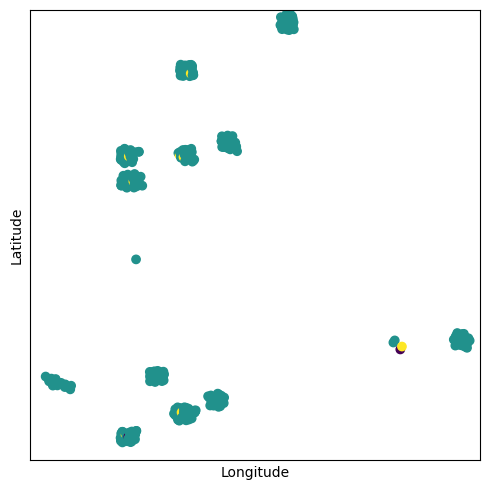

In [ ]:
# second figure shows standardized residuals at each point
z2=(y-y_pred)/sigma
print("Proportion of anomalous points is", (abs(z2)>2).sum()/(0.0+len(z2)))

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=(1.0*(z2>2)-1.0*(z2<-2)), vmin=-1, vmax=1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.tight_layout()
plt.show()

### (Part 2) - using lat/long and per capita income to predict hyperlocal temperature data

In [ ]:
#looking back at our dataframe
grouped_final_data.head()

,longitude,latitude,airtemp
0,-73.998978,40.683311,76.025720
1,-73.997135,40.681932,75.488549
2,-73.996809,40.680646,76.926632
3,-73.995408,40.682168,76.183613
4,-73.994581,40.679143,75.132877


In [ ]:
#merging our data
merged_df = pd.merge(grouped_final_data, final_data, on=['longitude', 'latitude'])
merged_df = merged_df[['latitude', 'longitude', 'airtemp_x', 'per_capita_income']]
merged_df

#dropping duplicates and nan values and getting a final dataframe with per_capita income added
merged_df2 = merged_df.drop_duplicates()
merged_df2 = merged_df2.dropna()
merged_df2 = merged_df2[['latitude', 'longitude', 'per_capita_income', 'airtemp_x']]

In [ ]:
#looking at our new dataframe
merged_df2.head()

,latitude,longitude,per_capita_income,airtemp_x
0,40.683311,-73.998978,90133.0,76.025720
2948,40.681932,-73.997135,82895.0,75.488549
5896,40.680646,-73.996809,82895.0,76.926632
8844,40.682168,-73.995408,95779.0,76.183613
11792,40.679143,-73.994581,81024.0,75.132877


In [ ]:
#setting our X as our lat/long/per capita income
X = merged_df2.iloc[:,0:3].values

#setting our y as our normalized average temperatures
y = np.log(merged_df2.iloc[:,3].values)
themean = y.mean()
y -= themean
print("Transforming y by taking the log and subtracting mean of", themean, "\n")

#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#define the kernel and the Gaussian process
kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=10.0, length_scale_bounds=(1e-2, 1e2))

#creating our model
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1)

#building our model
gp.fit(X_train, y_train)

#looking at our kernel
print("The kernel is", gp.kernel_, "with a log marginal likelihood value of", gp.log_marginal_likelihood_value_)

#predictions for the given points 
y_pred, sigma = gp.predict(X, return_std=True)

# Evaluate the model's performance
score = gp.score(X_test, y_test)
print("\nModel score (R^2): {:.3f}".format(score))

Transforming y by taking the log and subtracting mean of 4.3284227576375125 

The kernel is 0.0316**2 * RBF(length_scale=100) with a log marginal likelihood value of 59.02181867399324

Model score (R^2): 0.022


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


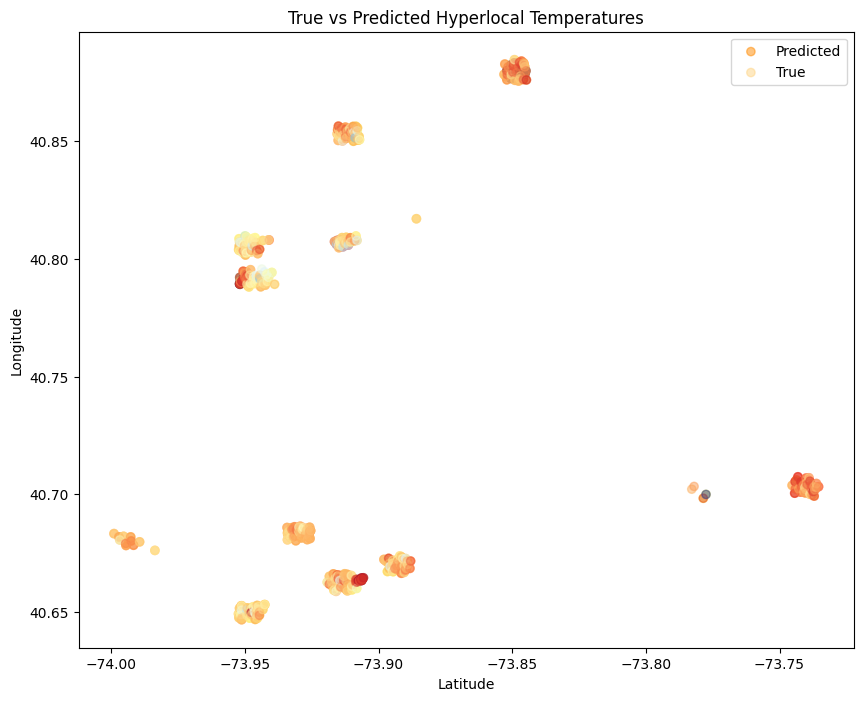

In [ ]:
#plotting our results
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 1], X[:, 0], c=y_pred, cmap="hot", alpha=0.5, label='Predicted')
plt.scatter(X[:, 1], X[:, 0], c=y, cmap="RdYlBu", alpha=0.5, label='True')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('True vs Predicted Hyperlocal Temperatures')
plt.legend()
plt.show()